In [6]:
!pip install kaggle
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [8]:
!chmod 600 /content/kaggle.json

In [9]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:14<00:00, 19.5MB/s]
100% 225M/225M [00:14<00:00, 16.7MB/s]


In [10]:
import zipfile
zip_file = zipfile.ZipFile('/content/flowers-recognition.zip', 'r')
zip_file.extractall('/tmp')

In [11]:
tf.__version__

'2.9.2'

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '/tmp/flowers',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 4317 images belonging to 5 classes.


In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 0 classes.


In [15]:
cnn = tf.keras.models.Sequential()

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [22]:
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [23]:
cnn.fit(x = training_set , validation_data = test_set , epochs = 5)

Epoch 1/5
135/135 [==============================] - 24s 107ms/step - loss: 1.2765 - accuracy: 0.4468
Epoch 2/5
135/135 [==============================] - 15s 113ms/step - loss: 1.0679 - accuracy: 0.5800
Epoch 3/5
135/135 [==============================] - 14s 106ms/step - loss: 0.9431 - accuracy: 0.6296
Epoch 4/5
135/135 [==============================] - 14s 104ms/step - loss: 0.8820 - accuracy: 0.6604
Epoch 5/5
135/135 [==============================] - 14s 104ms/step - loss: 0.8131 - accuracy: 0.6880


In [43]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('prediction/daisy.jpg',target_size=(64,64))
# test_image_view = test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 15ms/step


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [48]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('prediction/daisy.jpg', cv2.IMREAD_UNCHANGED)

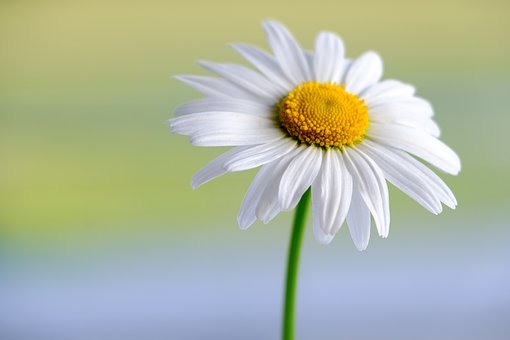

Daisy


In [49]:
cv2_imshow(img)
if result[0][0]==1:
    print('Daisy')
elif result[0][1]==1:
    print('Dandelion')
elif result[0][2]==1:
    print('Rose')
elif result[0][3]==1:
    print('SunFlower')
elif result[0][4]==1:
    print("Tulip")

In [30]:
print(result)

[[1. 0. 0. 0. 0.]]
